In [196]:
# import depends
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [197]:
# set csv paths 
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

In [198]:
# read city data 
city_pd = pd.read_csv(city_data, low_memory=False)

In [199]:
# rename and format columns in city data
city_data_form = city_pd.rename(columns={"city":"City", "driver_count": "Driver Count", 
                                                   "type":"Type"})
city_data_form.head()

,City,Driver Count,Type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [200]:
# read ride data
ride_pd = pd.read_csv(ride_data, low_memory=False)

In [201]:
# rename and format columns in city data
ride_data_form = ride_pd.rename(columns={"city":"City", "date": "Date", 
                                         "fare":"Fare", "ride_id": "Ride"})
ride_data_form.head()

,City,Date,Fare,Ride
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [202]:
pyber_pd = pd.merge(city_data_form, ride_data_form, on="City", how="outer")
pyber_pd.head()

,City,Driver Count,Type,Date,Fare,Ride
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [203]:
# total count of city types (Urban, Suburban, Rural)
city_type = pyber_pd.groupby(["City"])["Type"].unique().value_counts()
city_type

[Urban]       66
[Suburban]    41
[Rural]       18
Name: Type, dtype: int64

In [208]:
# Average Fare, and Driver Count by City Type 

avg_rides_by_type = pyber_pd.groupby(["Type"]).mean()
avg_rides_by_type

,Driver Count,Fare,Ride
Type,,,
Rural,5.816000,34.040720,5.269835e+12
Suburban,14.809741,30.952344,4.778666e+12
Urban,39.692923,24.663594,4.855504e+12


In [212]:
# Total Number of Rides Per City Type
total_rides_by_city = pyber_pd.groupby(["Type"]).count()["Fare"]
total_rides_by_city.head()

Type
Rural        125
Suburban     657
Urban       1625
Name: Fare, dtype: int64

In [220]:
# Chart for - % of Total Fares by City Type 

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [24, 30, 34]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

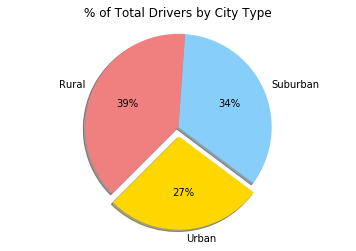

In [221]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.f%%', shadow=True, startangle=225)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

In [ ]:
# Chart for - % of Total Rides by City Type

In [217]:
# Chart for % of Drivers by City Type 

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [39.7, 14.8, 5.81]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [218]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.f%%', shadow=True, startangle=225)

([<matplotlib.patches.Wedge at 0x1132e89e8>,
  <matplotlib.text.Text at 0x113309f28>])

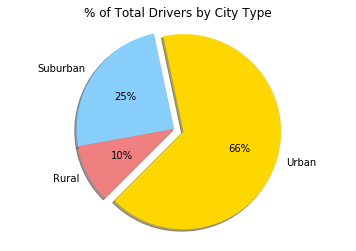

In [219]:
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()